Mean Absolute Error (MAE): 3.0240148654713623
Root Mean Squared Error (RMSE): 3.9640037624748614
explained_variance_score: 0.5585115074832563


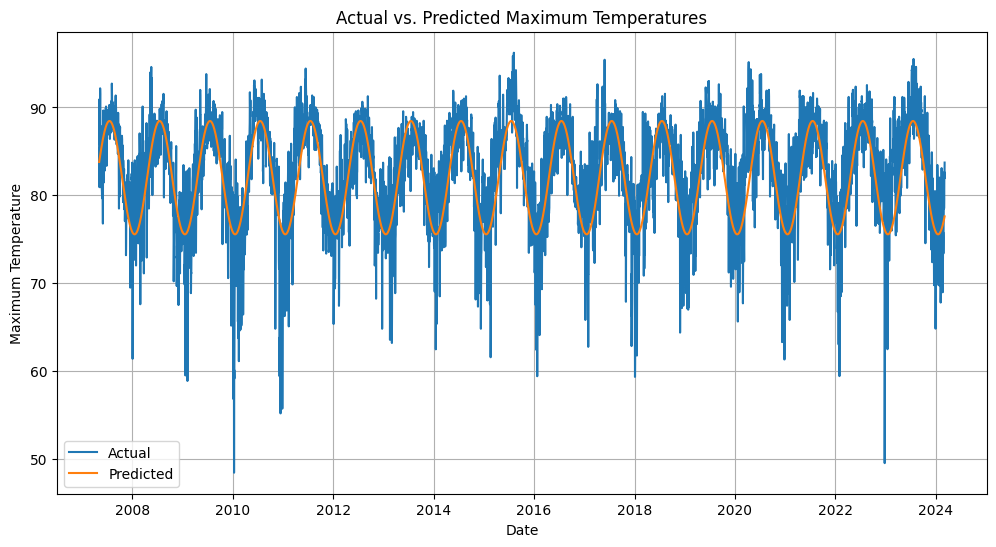

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split

weather_data = pd.read_csv('../data/miami_weather.csv')
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['day_of_year'] = weather_data['date'].dt.dayofyear

# Create sinusoidal features
weather_data['sin_day'] = np.sin(2 * np.pi * weather_data['day_of_year'] / 365)
weather_data['cos_day'] = np.cos(2 * np.pi * weather_data['day_of_year'] / 365)

# Create a new DataFrame with relevant features
data = weather_data[['date', 'day_of_year', 'sin_day', 'cos_day', 'temperature_2m_max']]

# Convert the data to numpy arrays
X = data[['sin_day','cos_day']].values
y = data['temperature_2m_max'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("explained_variance_score:", explained_variance_score(y_test, y_pred))

# Get the corresponding dates for the testing set
test_dates = data['date'].iloc[-len(X_test):]

# Plot the actual vs. predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs. Predicted Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.show()

Mean Absolute Error (MAE): 2.0428654256080936
Root Mean Squared Error (RMSE): 2.8073404764864263
Explained Variance Score: 0.7684411864060018


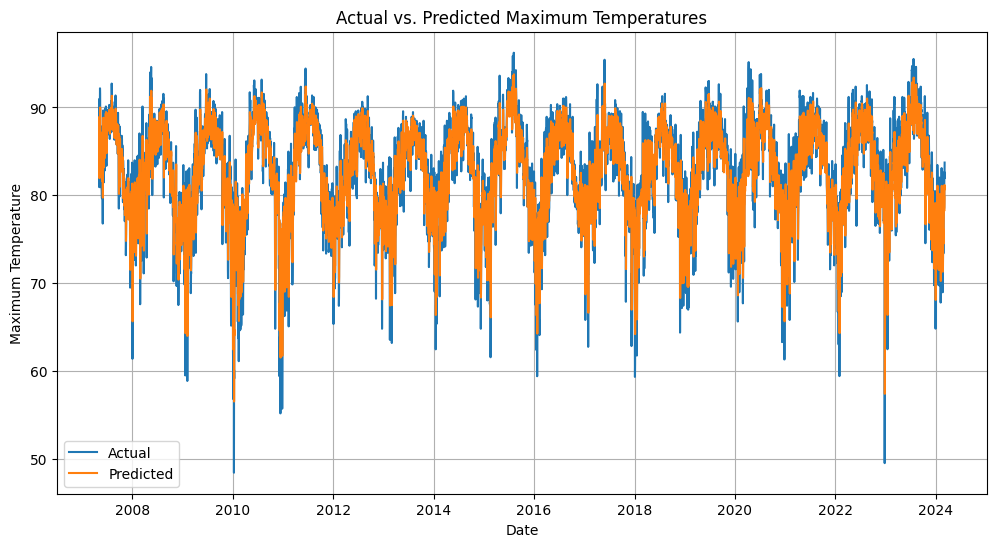

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split

weather_data = pd.read_csv('../data/miami_weather.csv')
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['day_of_year'] = weather_data['date'].dt.dayofyear

# Create sinusoidal features
weather_data['sin_day'] = np.sin(2 * np.pi * weather_data['day_of_year'] / 365)
weather_data['cos_day'] = np.cos(2 * np.pi * weather_data['day_of_year'] / 365)

# Create yesterday's maximum temperature feature
weather_data['yesterday_max_temp'] = weather_data['temperature_2m_max'].shift(1)

# Create a new DataFrame with relevant features
data = weather_data[['date', 'sin_day', 'cos_day', 'yesterday_max_temp', 'temperature_2m_max']]
data = data.dropna()  # Remove rows with missing values

# Convert the data to numpy arrays
X = data[['sin_day', 'cos_day', 'yesterday_max_temp']].values
y = data['temperature_2m_max'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", explained_variance_score(y_test, y_pred))

# Get the corresponding dates for the testing set
test_dates = data['date'].iloc[-len(X_test):]

# Plot the actual vs. predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs. Predicted Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.show()

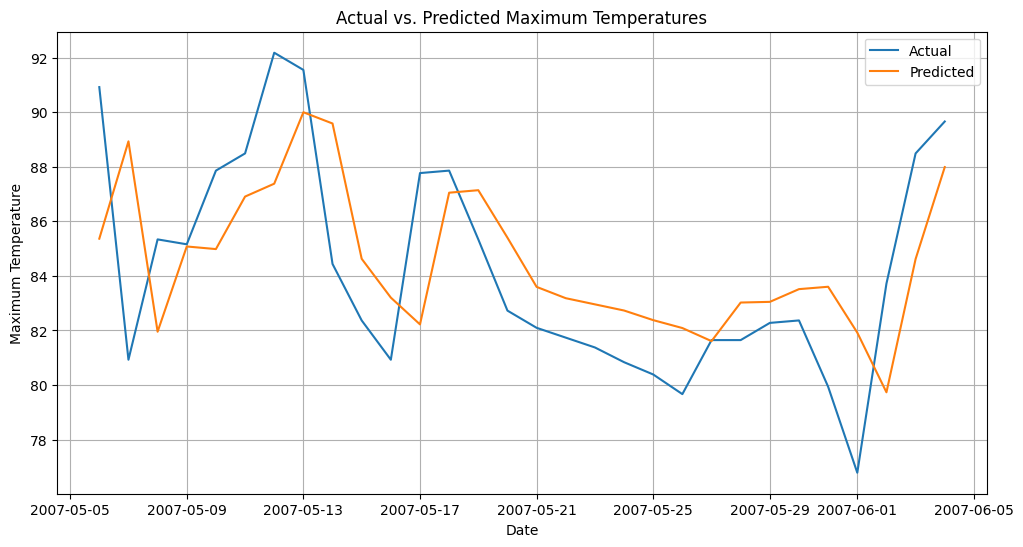

In [3]:
# plot a smaller subset of the data
plt.figure(figsize=(12, 6))
plt.plot(test_dates[:30], y_test[:30], label='Actual')
plt.plot(test_dates[:30], y_pred[:30], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.title('Actual vs. Predicted Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.show()